                                 Credit Risk Analysis Project                                                    

In [204]:
                                    #About the project                                                         
#The Credit Risk Analysis project falls under the broad domain of financial risk management, which is a critical 
# aspect of the financial services industry. The project aims to leverage advanced data analytics and machine 
# learning techniques to develop a robust credit risk prediction model. This encompasses key areas of work, 
# including data management, feature engineering, model development and optimization, model validation and testing,
# and model deployment and monitoring. The overarching goal is to enhance the financial institution's credit risk
# management capabilities, improve risk-adjusted returns, and contribute to the overall financial stability and 
# profitability of the organization. By leveraging data-driven insights, the project aims to optimize the credit 
# organization leading to better lending decisions and reduced credit losses.

                               Import Libraries                                                             

In [205]:
#!pip install imbalanced-learn
#!pip install tensorflow

In [206]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn import metrics  
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Display all rows in the notebook
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



In [207]:
#Read the csv file to the pandas dataframe
#source of data is kaggle
data=pd.read_csv("credit_risk_dataset.csv")

In [208]:
data.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

                               Exploratory Data Analysis                                                          

In [209]:
shape=data.shape
print("Before increase :Number of Rows are {} and columns are  {} ".format(shape[0],shape[1]))
#df = data.sample(n=len(data) * 2, replace=True)  # Double the size of your dataset


Before increase :Number of Rows are 32581 and columns are  12 


In [210]:
# Reset the index to ensure unique index labels
df = data.reset_index(drop=True)

# Perform random sampling with replacement
df = df.sample(n=len(df) * 2, replace=True)

# Optionally, reset the index of the augmented data
df.reset_index(drop=True, inplace=True)

In [211]:
df.shape

(65162, 12)

In [212]:
#List of EDA Activities
#Get the shape
#Describe the data
#Check for NULLs
#Check for duplicate data
#Data Imbalance Check
#Outliers check
#Correlation Check
#Data Sckeweness Check

In [213]:
#Get the number of rows and columns
shape=df.shape
print("After Increase :Number of Rows are {} and columns are  {} ".format(shape[0],shape[1]))

After Increase :Number of Rows are 65162 and columns are  12 


In [214]:
df.tail()

person_age  person_income person_home_ownership  person_emp_length  \
65157          47          44000                   OWN                3.0   
65158          25          60000                  RENT                5.0   
65159          26         200000              MORTGAGE                4.0   
65160          26          67000              MORTGAGE               10.0   
65161          27          39000                  RENT                1.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
65157  HOMEIMPROVEMENT          B       4000          11.14            0   
65158  HOMEIMPROVEMENT          A      10000           7.14            0   
65159         PERSONAL          C       3000          13.92            0   
65160         PERSONAL          B      10000          12.21            0   
65161          MEDICAL          B       9000          10.08            0   

       loan_percent_income cb_person_default_on_file  \
65157                 0.09                         N   
65158                 0.17                         N   
65159                 0.01                         N   
65160                 0.15                         N   
65161                 0.23                         N   

       cb_person_cred_hist_length  
65157                          16  
65158                           4  
65159                           3  
65160                           3  
65161                           8

In [215]:
#Decsribe the dataset
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  65162.000000   6.516200e+04       63467.000000  65162.000000   
mean      27.728799   6.575864e+04           4.790096   9610.992219   
std        6.350898   5.571023e+04           4.120035   6355.698933   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.840000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.900000e+04           7.000000  12025.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   58874.000000  65162.000000         65162.000000   
mean       11.036913      0.221080             0.170564   
std         3.261963      0.414977             0.106813   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.480000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                65162.000000  
mean                     5.809674  
std                      4.060419  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

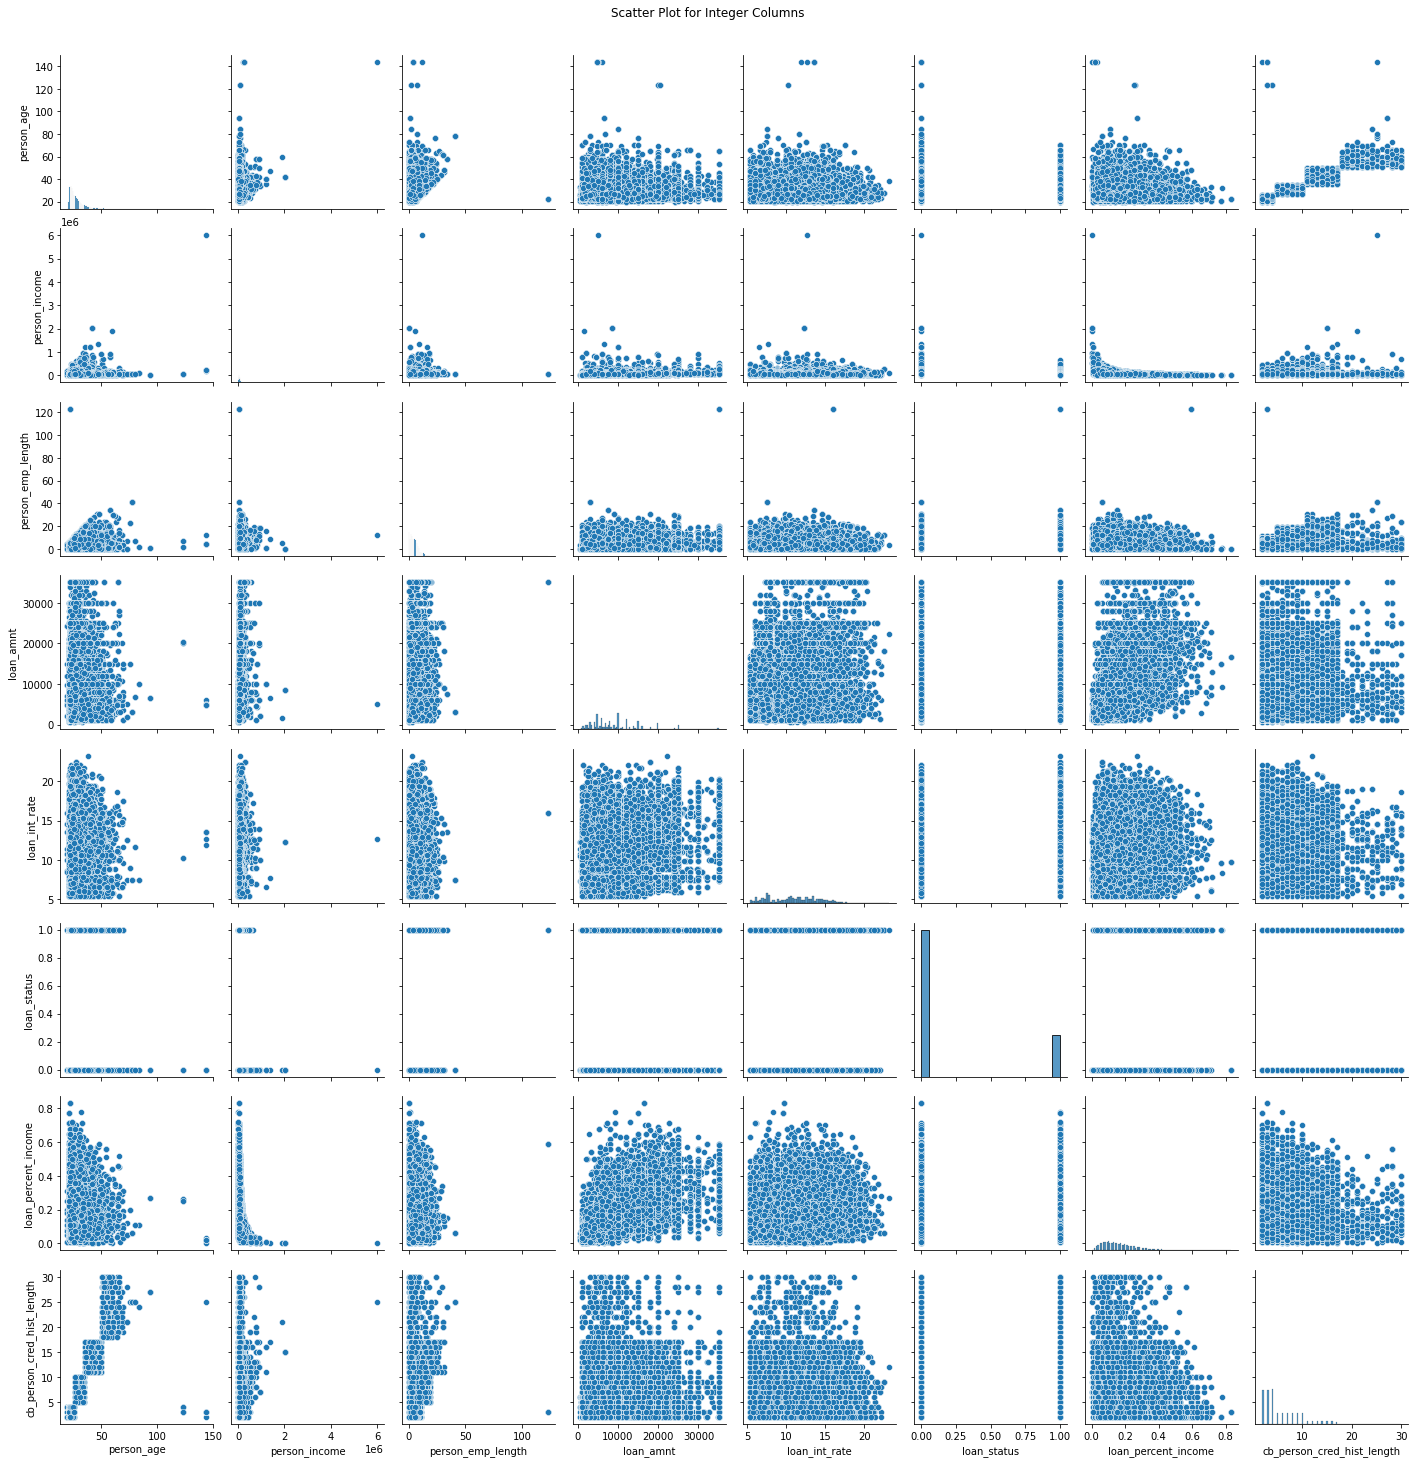

In [216]:
# Scatter Plot integer and Float columns
cols = df.select_dtypes(include=['int', 'float'])

# Create a pairplot for integer columns
sns.pairplot(cols)
plt.suptitle('Scatter Plot for Integer Columns', y=1.02)
plt.show()

In [217]:
#Check for NULL records
print("Columns                       IsNull")
print("=========================================")
print(df.isnull().any())

#Check for NULL Count
print("\n========================================")
print("Columns                       NullCount")
print("=========================================")
print(df.isnull().sum())


Columns                       IsNull
person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length              True
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                  True
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
dtype: bool

Columns                       NullCount
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length             1695
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 6288
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [218]:
#Duplicate data Check

# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')


# Get the duplicate rows
duplicates = df[df.duplicated()]
duplicates.head()

Number of duplicate rows: 37057


person_age  person_income person_home_ownership  person_emp_length  \
306          24         101900              MORTGAGE                0.0   
317          22          33600                  RENT                6.0   
373          24          50000                  RENT                8.0   
452          25          80000              MORTGAGE                2.0   
586          24          50000                  RENT                8.0   

    loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
306     VENTURE          A      13600           6.62            0   
317    PERSONAL          D       9000            NaN            1   
373    PERSONAL          C       8000          15.96            0   
452   EDUCATION          B      22000          11.48            0   
586    PERSONAL          C       8000          15.96            0   

     loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
306                 0.13                         N                           3  
317                 0.27                         N                           4  
373                 0.16                         N                           3  
452                 0.28                         N                           3  
586                 0.16                         N                           3

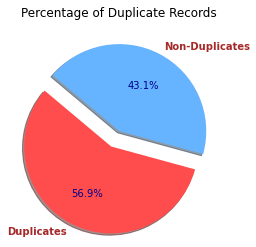

In [219]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
total_rows = len(df)
num_non_duplicates = total_rows - num_duplicates

# Data for pie chart
labels = ['Duplicates', 'Non-Duplicates']
sizes = [num_duplicates, num_non_duplicates]
colors = ['#ff4d4d','#66b3ff']
explode = (0.2, 0)  # explode the 1st slice

# Plotting the pie chart
plt.figure(figsize=(6, 4))
patches, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

# Make the labels and percentages more visible
for text in texts:
    text.set_fontsize(10)
    text.set_color('brown')
    text.set_weight('bold')
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('darkblue')


plt.title('Percentage of Duplicate Records')
plt.show()


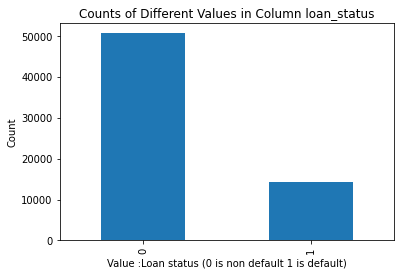

In [220]:
#Data Imbalance Check

value_counts_loan_status=df["loan_status"].value_counts(dropna=True)

# Plotting the bar plot
plt.figure(figsize=(6, 4))
value_counts_loan_status.plot(kind='bar')
plt.title('Counts of Different Values in Column loan_status')
plt.xlabel('Value :Loan status (0 is non default 1 is default)')
plt.ylabel('Count')
plt.show()

In [221]:
#Outliers check
#Function to detect outliers using IQR(Inter Quartile Range) method
def outliers_detection(df):
    outliers = pd.DataFrame(columns=df.columns)
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers = pd.concat([outliers, outliers_col])
    return outliers

# Outliers Detectionin the DataFrame
outliers = outliers_detection(df)

print("Outliers detected:")
outliers.head()

Outliers detected:


<ipython-input-221-25b948b09449>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([outliers, outliers_col])


person_age person_income person_home_ownership  person_emp_length  \
31          41        171194              MORTGAGE                9.0   
64          43         54000                  RENT                0.0   
81          47        100000              MORTGAGE                4.0   
102         48         32500                  RENT                0.0   
121         42         52400              MORTGAGE               14.0   

           loan_intent loan_grade loan_amnt  loan_int_rate loan_status  \
31     HOMEIMPROVEMENT          B     25000          11.12           0   
64   DEBTCONSOLIDATION          A      3000           8.94           0   
81             VENTURE          B      2500           9.99           0   
102            VENTURE          D      2000          17.27           1   
121    HOMEIMPROVEMENT          B     21000          10.38           0   

     loan_percent_income cb_person_default_on_file cb_person_cred_hist_length  
31                  0.15                         N                         14  
64                  0.06                         N                         14  
81                  0.03                         N                         16  
102                 0.06                         N                         16  
121                 0.40                         N                         13

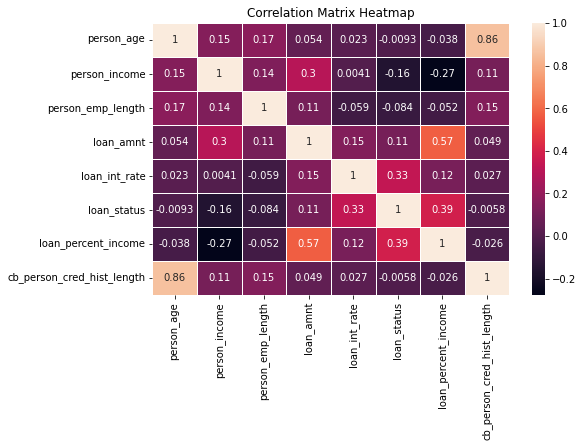

In [222]:
# Correclation Heatmap : Selecting only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, linewidths=0.7)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [223]:
# Set the threshold for correlation
threshold = 0.70

# Create a mask to ignore self-correlations
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Extract the pairs of columns with correlation greater than the threshold
correlated_columns = [(corr_matrix.index[i], corr_matrix.columns[j]) 
                      for i in range(corr_matrix.shape[0]) 
                      for j in range(i+1, corr_matrix.shape[1]) 
                      if corr_matrix.iloc[i, j] > threshold]

# Print the correlated columns
print("Correlated columns with correlation percent greathen then 0.70")
print("-----------------------------------------------------------------")
for col_pair in correlated_columns:
    print(col_pair[0] ,"<--Matched with-->",col_pair[1])

Correlated columns with correlation percent greathen then 0.70
-----------------------------------------------------------------
person_age <--Matched with--> cb_person_cred_hist_length


                                   Feature Engineering                                                        

In [224]:
# Feature Engineering involve handling the features for correction/cleaning/adding/removing/scaling features
# Null Value handling

# Columns to fill null values
columns_with_nulls = ['person_emp_length', 'loan_int_rate']

# Fill null values in the specified columns with the median value of each column
for column in columns_with_nulls:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

print("Columns ",columns_with_nulls," after filling with mean:")

#Check for NULL records
print("Columns                       IsNull")
print("=========================================")
print(df.isnull().any())



Columns  ['person_emp_length', 'loan_int_rate']  after filling with mean:
Columns                       IsNull
person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length             False
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                 False
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
dtype: bool


In [225]:
#Handling Duplicates
print("Count of Duplicate Records :",df.duplicated().sum())

# Remove duplicate records
df_cleaned = df.drop_duplicates()

print("Count of Duplicate Records post Removal :",df_cleaned.duplicated().sum())

Count of Duplicate Records : 37057
Count of Duplicate Records post Removal : 0


In [226]:
df_cleaned.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          24          50000                  RENT                8.0   
1          25          44000                  RENT                9.0   
2          23          45756                  RENT                8.0   
3          26          48000                  RENT                5.0   
4          34          38000              MORTGAGE               12.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    HOMEIMPROVEMENT          D       2000      11.036913            0   
1            MEDICAL          C       8500      14.270000            1   
2            MEDICAL          A      10000       7.290000            0   
3            VENTURE          F      25000      18.430000            1   
4  DEBTCONSOLIDATION          B      12775       9.910000            0   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.04                         N                           2  
1                 0.19                         N                           4  
2                 0.22                         N                           2  
3                 0.52                         N                           2  
4                 0.34                         N                           5

In [227]:
#Handle Data Imbalance issue
df_cleaned["loan_status"].value_counts(dropna=True)

loan_status
0    21951
1     6154
Name: count, dtype: int64

In [228]:
#Scaled Data
df_cleaned.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          24          50000                  RENT                8.0   
1          25          44000                  RENT                9.0   
2          23          45756                  RENT                8.0   
3          26          48000                  RENT                5.0   
4          34          38000              MORTGAGE               12.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    HOMEIMPROVEMENT          D       2000      11.036913            0   
1            MEDICAL          C       8500      14.270000            1   
2            MEDICAL          A      10000       7.290000            0   
3            VENTURE          F      25000      18.430000            1   
4  DEBTCONSOLIDATION          B      12775       9.910000            0   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.04                         N                           2  
1                 0.19                         N                           4  
2                 0.22                         N                           2  
3                 0.52                         N                           2  
4                 0.34                         N                           5

In [229]:
# Sort the DataFrame by 'person_income' in descending order
df_final = df_cleaned.sort_values(by="person_income", ascending=False)

# Delete the top 5 values
df_final = df_final.iloc[5:]

# Reset the index of the resulting DataFrame
df_final.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(df_final)

       person_age  person_income person_home_ownership  person_emp_length  \
0              40        1200000              MORTGAGE           1.000000   
1              34         948000              MORTGAGE          18.000000   
2              50         900000              MORTGAGE          11.000000   
3              58         900000                  RENT          18.000000   
4              36         900000              MORTGAGE           8.000000   
5              42         889000                  RENT          13.000000   
6              36         828000              MORTGAGE           3.000000   
7              37         800000              MORTGAGE          10.000000   
8              58         780000              MORTGAGE           7.000000   
9              37         780000                  RENT           9.000000   
10             43         780000              MORTGAGE           2.000000   
11             58         780000              MORTGAGE           7.000000   

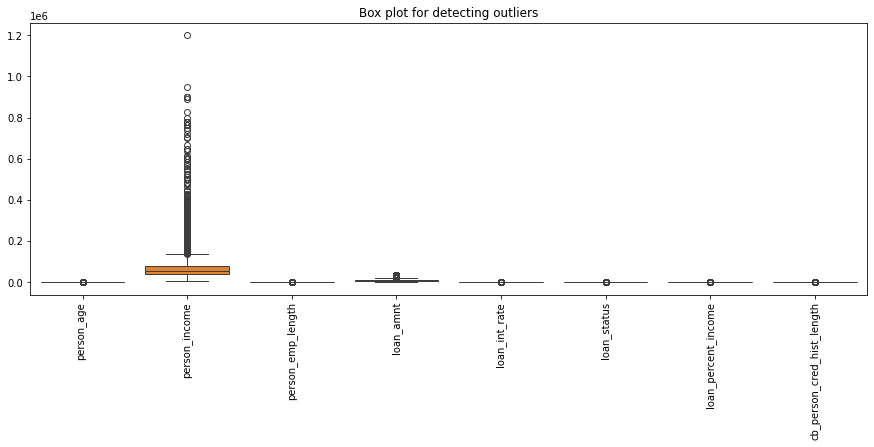

In [230]:
# Plot box plot for each feature to visually identify outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_final)
plt.title("Box plot for detecting outliers")
plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
plt.show()

# Function to remove outliers based on IQR
def remove_outliers(df):
    for column in df.select_dtypes(include=[float, int]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers for all columns
#df_final = remove_outliers(df_final)



In [231]:
df_final.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          40        1200000              MORTGAGE                1.0   
1          34         948000              MORTGAGE               18.0   
2          50         900000              MORTGAGE               11.0   
3          58         900000                  RENT               18.0   
4          36         900000              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0            MEDICAL          A      10000      11.036913            0   
1           PERSONAL          B       2000       9.990000            0   
2  DEBTCONSOLIDATION          B      30000      12.690000            0   
3  DEBTCONSOLIDATION          C      19600      13.980000            0   
4           PERSONAL          B       6000      11.036913            0   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.01                         N                          16  
1                 0.00                         N                           7  
2                 0.03                         N                          15  
3                 0.02                         N                          28  
4                 0.01                         N                          12

                               Train and Testing Split                                           

In [232]:
#X (independent) and y (dependent) variables 
X = df_final.drop('loan_status', axis=1)
y = df_final['loan_status']

In [233]:
#Train test Split for 80:20 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [234]:
X_train.shape

(22480, 11)

In [235]:
X_test.shape

(5620, 11)

In [236]:
# Categorical & Numericals columns list
categoricals =['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']
numericals   =['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']


In [237]:
# Define preprocessing for categorical features
# It allows us to create and apply different transformations to specific columns of our data
# We are applying OneHotEncoding on cetegorical columns and Standard scaler on numericals 
preprocessor = ColumnTransformer(
    transformers=[
        ('categoricals', OneHotEncoder(handle_unknown='ignore'), categoricals),
         ('numericals', StandardScaler(), numericals)
    ],
    remainder='passthrough'
)


                             Model Selection/Creation                                                    

### Random Forest classifier

In [238]:
X_train.head()

person_age  person_income person_home_ownership  person_emp_length  \
18026          25          45000              MORTGAGE                9.0   
8364           34          73000              MORTGAGE                7.0   
11082          23          63816                  RENT                4.0   
3248           25         105000              MORTGAGE                9.0   
11117          22          63400              MORTGAGE                6.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  \
18026          EDUCATION          A       5000      11.036913   
8364     HOMEIMPROVEMENT          A      20675      11.036913   
11082          EDUCATION          B       3500       9.630000   
3248   DEBTCONSOLIDATION          B      12000      11.036913   
11117           PERSONAL          B      10500       9.990000   

       loan_percent_income cb_person_default_on_file  \
18026                 0.11                         N   
8364                  0.28                         N   
11082                 0.05                         N   
3248                  0.11                         N   
11117                 0.17                         N   

       cb_person_cred_hist_length  
18026                           3  
8364                            7  
11082                           3  
3248                            2  
11117                           2

In [239]:
# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

In [240]:
X_train_preprocessed

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.27582440e-03, -5.64954697e-01, -6.89035546e-01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.27582440e-03,  1.02916720e+00,  2.95832937e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.55801199e-01, -1.12758595e+00, -6.89035546e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.59743589e+00, -1.22135783e+00,  1.03448430e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.14454528e+00, -6.58726573e-01, -1.96601304e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.12339073e-01,  5.60307816e-01, -1.96601304e-01]])

In [241]:
# Apply SMOTE to the preprocessed training data
smote = SMOTE(sampling_strategy=0.99, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

In [242]:
# Creating a Random Forest classifier
#Random forest is a machine learning algorithm,that combines the output of multiple decision trees to reach a
#single result. It is used to handles both classification and regression problems.


model = RandomForestClassifier(n_estimators = 100)  
 
# Training the model on the training dataset
model.fit(X_train_resampled, y_train_resampled)

# Preprocess the test data
X_test_preprocessed = preprocessor.transform(X_test)

# Predict on the test data
y_pred = model.predict(X_test_preprocessed)


In [243]:
# Using metrics module for accuracy,presion,recall,f1-score calculation
print("Model Accuracy  (in %) :", metrics.accuracy_score(y_test, y_pred)*100)
print("Model Precision (in %) :", metrics.precision_score(y_test, y_pred)*100)
print("Model Recall    (in %) :", metrics.recall_score(y_test, y_pred)*100)
print("Model F1-Score  (in %) :", metrics.f1_score(y_test, y_pred)*100)

Model Accuracy  (in %) : 92.38434163701068
Model Precision (in %) : 93.02554027504911
Model Recall    (in %) : 72.62269938650306
Model F1-Score  (in %) : 81.56761412575366


### Random Forest Classifier using Hyperparameter Tunning

In [244]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [200,300,400 ],
    'max_depth': [None,10,20,30],
    'min_samples_split': [6,8,10],
    'max_features': ['sqrt','log2'],
}

# # Create a based model

model = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)

In [245]:
# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)
grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 6,
 'n_estimators': 300}

In [246]:
best_grid = grid_search.best_estimator_

#Make the prediction
y_pred=best_grid.predict(X_test_preprocessed)

In [247]:
# Using metrics module for accuracy,presion,recall,f1-score calculation
print("Model Accuracy  (in %) :", metrics.accuracy_score(y_test, y_pred)*100)
print("Model Precision (in %) :", metrics.precision_score(y_test, y_pred)*100)
print("Model Recall    (in %) :", metrics.recall_score(y_test, y_pred)*100)
print("Model F1-Score  (in %) :", metrics.f1_score(y_test, y_pred)*100)

Model Accuracy  (in %) : 92.58007117437722
Model Precision (in %) : 93.86745796241345
Model Recall    (in %) : 72.7760736196319
Model F1-Score  (in %) : 81.98704103671706


In [248]:
# Save the Credit Risk Model
model_pkl_file = "model_rf.pkl"  

# Assuming you have already trained and fitted the model
with open(model_pkl_file, 'wb') as file:
    pickle.dump({
        'preprocessor': preprocessor,
        'model': model
    }, file)


### XGBoost Classifiers

In [249]:
# XGBoost(extreme gradient boosting) is built on gradient-boosting architecture.XGBoost is used 
# for supervised (classification and regression problems) machine learning problems.
# It is usefull when we have large number of training data.
model = XGBClassifier()

model.fit(X_train_resampled, y_train_resampled)

# Prediction on test dataset
y_pred = model.predict(X_test_preprocessed)
 

In [250]:
# Using metrics module for accuracy,presion,recall,f1-score calculation
print("Model Accuracy  (in %) :", metrics.accuracy_score(y_test, y_pred)*100)
print("Model Precision (in %) :", metrics.precision_score(y_test, y_pred)*100)
print("Model Recall    (in %) :", metrics.recall_score(y_test, y_pred)*100)
print("Model F1-Score  (in %) :", metrics.f1_score(y_test, y_pred)*100)

Model Accuracy  (in %) : 93.04270462633451
Model Precision (in %) : 95.24281466798811
Model Recall    (in %) : 73.6963190184049
Model F1-Score  (in %) : 83.09554690877648


In [251]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [200, 300 , 400],
    'learning_rate': [0.1, 0.2],
    'max_depth': [5, 10, 15],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)



Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.1, 0.2], 'max_depth': [5, 10, 15],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [200, 300, 400],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=1)

In [252]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

# Train the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test_preprocessed)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9}
Best Score (Accuracy): 0.9543671713377627


In [253]:
#Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 15, 'min_child_weight': 1, 
# 'n_estimators': 300, 'subsample': 0.9}

#Best Score (Accuracy): 0.9543264433357092

# Using metrics module for accuracy,presion,recall,f1-score calculation
print("Model Accuracy  (in %) :", metrics.accuracy_score(y_test, y_pred)*100)
print("Model Precision (in %) :", metrics.precision_score(y_test, y_pred)*100)
print("Model Recall    (in %) :", metrics.recall_score(y_test, y_pred)*100)
print("Model F1-Score  (in %) :", metrics.f1_score(y_test, y_pred)*100)

Model Accuracy  (in %) : 93.27402135231317
Model Precision (in %) : 95.7509881422925
Model Recall    (in %) : 74.30981595092024
Model F1-Score  (in %) : 83.67875647668394


In [254]:
# Save the Credit Risk Model
model_pkl_file = "model_xgb.pkl"  

# Assuming you have already trained and fitted the model
with open(model_pkl_file, 'wb') as file:
    pickle.dump({
        'preprocessor': preprocessor,
        'model': model
    }, file)

### Artificial Neural Network

In [255]:
# Initialize the ANN model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=16, activation='relu', input_shape=(X_train_resampled.shape[1],)))

# Add second hidden layer
model.add(Dense(units=8, activation='relu'))

# Add third hidden layer
model.add(Dense(units=8, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))  # For binary classification, use sigmoid activation

In [256]:
#Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [257]:
# Preprocess the test data
X_test_preprocessed = preprocessor.transform(X_test)
history = model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=50, validation_data=(X_test_preprocessed, y_test))

Epoch 1/100
702/702 [==============================] - 6s 5ms/step - loss: 0.4644 - accuracy: 0.7857 - val_loss: 0.3835 - val_accuracy: 0.8397
Epoch 2/100
702/702 [==============================] - 2s 3ms/step - loss: 0.3781 - accuracy: 0.8292 - val_loss: 0.3513 - val_accuracy: 0.8559
Epoch 3/100
702/702 [==============================] - 3s 4ms/step - loss: 0.3559 - accuracy: 0.8393 - val_loss: 0.3365 - val_accuracy: 0.8689
Epoch 4/100
702/702 [==============================] - 2s 3ms/step - loss: 0.3435 - accuracy: 0.8432 - val_loss: 0.3487 - val_accuracy: 0.8616
Epoch 5/100
702/702 [==============================] - 2s 3ms/step - loss: 0.3355 - accuracy: 0.8467 - val_loss: 0.3083 - val_accuracy: 0.8836
Epoch 6/100
702/702 [==============================] - 2s 3ms/step - loss: 0.3287 - accuracy: 0.8488 - val_loss: 0.3270 - val_accuracy: 0.8742
Epoch 7/100
702/702 [==============================] - 2s 3ms/step - loss: 0.3226 - accuracy: 0.8522 - val_loss: 0.3125 - val_accuracy: 0.8815

In [258]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_preprocessed, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


176/176 [==============================] - 0s 2ms/step - loss: 0.2800 - accuracy: 0.9016
Test Accuracy: 0.9016


In [260]:
# Make predictions
y_pred = model.predict(X_test_preprocessed)


176/176 [==============================] - 0s 2ms/step


In [262]:
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary outcomes

# Check the first 10 predictions
print(y_pred[:10])

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]


In [263]:
# # Using metrics module for accuracy,presion,recall,f1-score calculation
print("Model Accuracy  (in %) :", metrics.accuracy_score(y_test, y_pred)*100)
print("Model Precision (in %) :", metrics.precision_score(y_test, y_pred)*100)
print("Model Recall    (in %) :", metrics.recall_score(y_test, y_pred)*100)
print("Model F1-Score  (in %) :", metrics.f1_score(y_test, y_pred)*100)

Model Accuracy  (in %) : 90.16014234875445
Model Precision (in %) : 81.58116063919259
Model Recall    (in %) : 74.38650306748467
Model F1-Score  (in %) : 77.81789009225832


In [261]:
# Save the Credit Risk Model
model_pkl_file = "model_ann.pkl"  

# Assuming you have already trained and fitted the model
with open(model_pkl_file, 'wb') as file:
    pickle.dump({
        'preprocessor': preprocessor,
        'model': model
    }, file)